In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df =  pd.read_csv("D:\chaki\weatherHistory.csv")
df.head(10)

In [3]:
df.shape

(96453, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# missing values

In [5]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
df = df.dropna(subset = ['Precip Type'])

In [7]:
df = df.drop('Loud Cover', axis = 1)

In [8]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

# Duplicates

In [9]:
duplicates = df.duplicated(subset=['Formatted Date','Temperature (C)','Pressure (millibars)'])
print(duplicates.sum())

24


In [10]:
df.drop_duplicates(subset=['Formatted Date','Temperature (C)','Pressure (millibars)'], inplace = True)

In [11]:
df[duplicates]

C:\Users\hp\AppData\Local\Temp\ipykernel_13420\1721321299.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[duplicates]


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary


# Outliers

<AxesSubplot:>

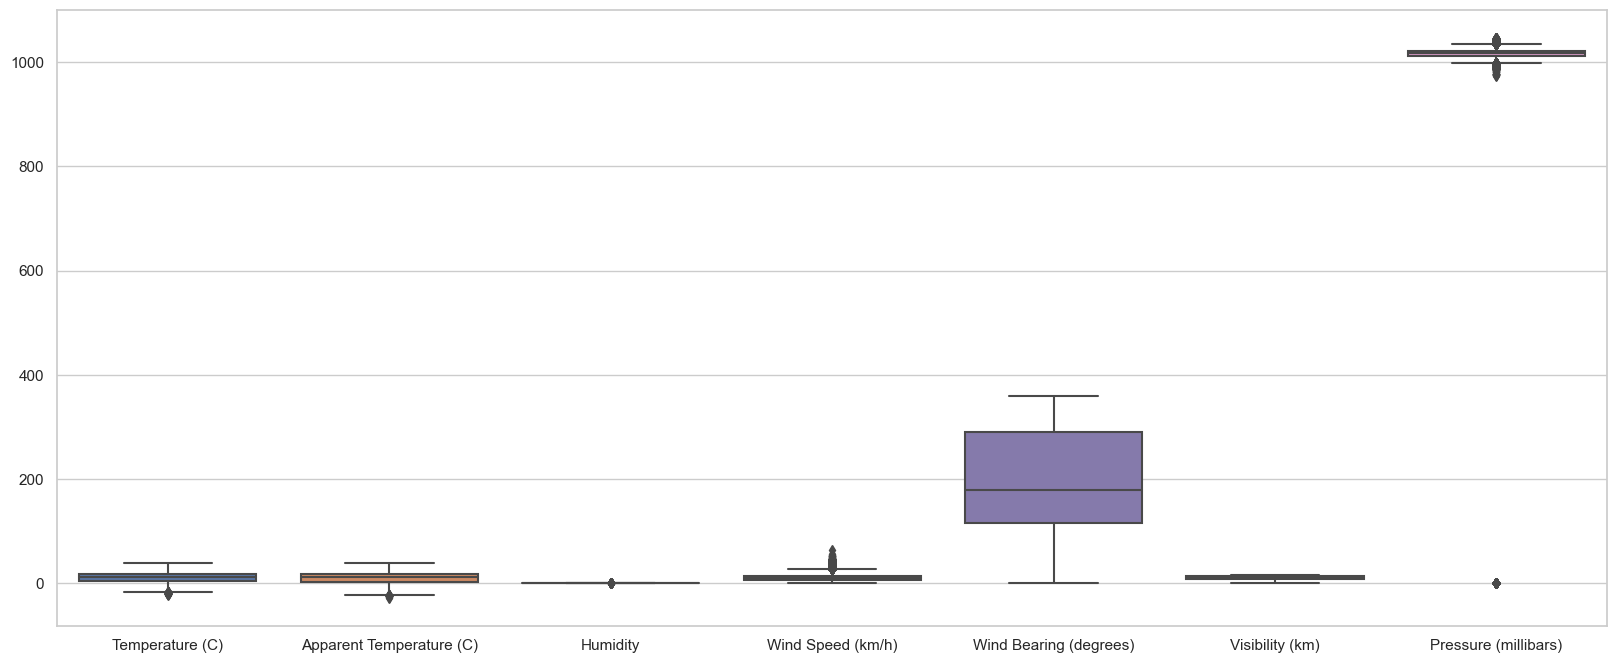

In [12]:
sns.set(rc={'figure.figsize':(20,8)}, style='whitegrid')
sns.boxplot(data = df)

In [13]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000
mean,11.937975,10.859194,0.734844,10.806764,187.506986,10.362306,1003.146959
std,9.569620,10.716711,0.195717,6.920504,107.378309,4.174204,117.291484
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.594444,2.272222,0.600000,5.812100,116.000000,8.355900,1011.890000
50%,12.022222,12.022222,0.780000,9.933700,180.000000,10.046400,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


<AxesSubplot:>

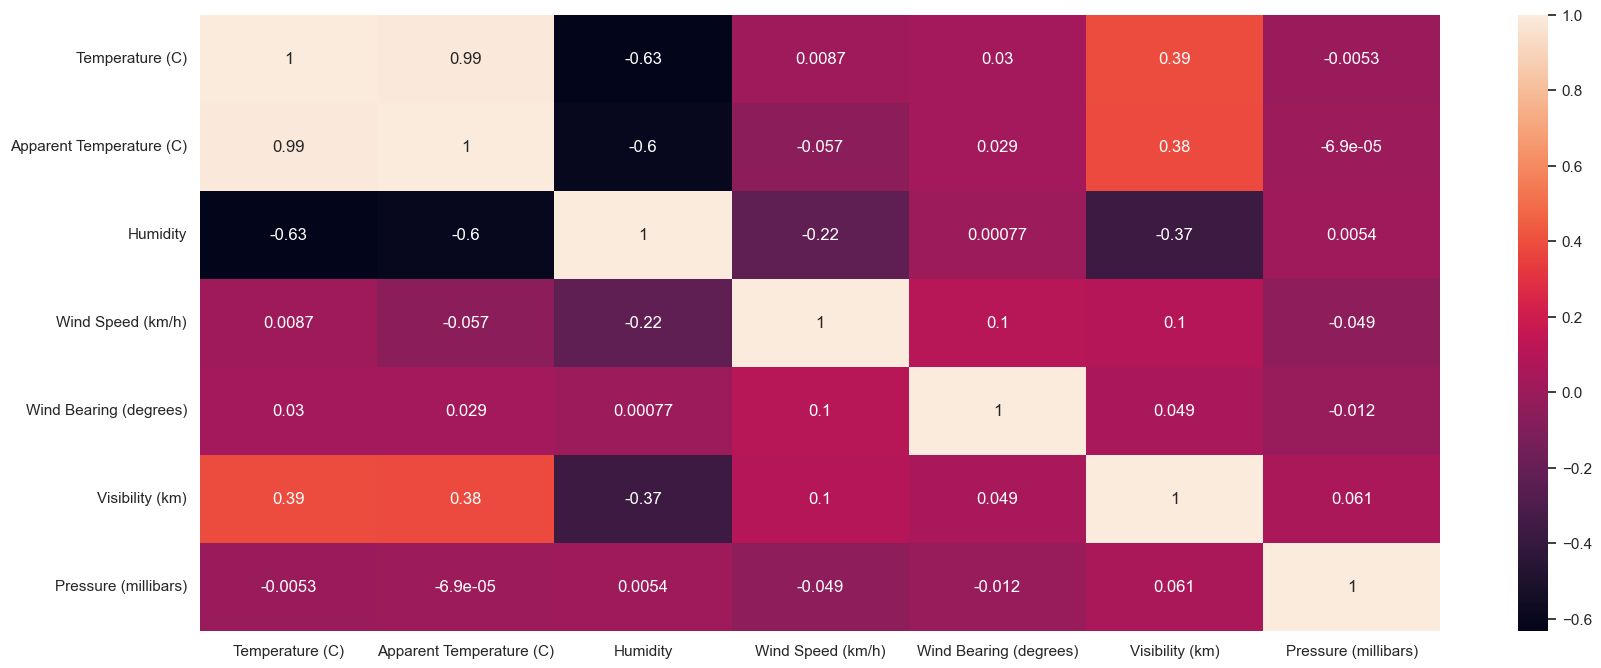

In [14]:
sns.heatmap(df.corr(), annot = True)

# Model

In [15]:
X = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]
y = df[['Apparent Temperature (C)']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42)

In [17]:
#ntransformation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## linear regression model

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test_scaled)

In [21]:
mse = mean_squared_error(y_test,y_pred )
r2 = r2_score(y_test, y_pred)


In [22]:
print(f"Mean Square Error : {mse}")
print(f"R Squared : {r2}")

Mean Square Error : 1.1682429028860082
R Squared : 0.9898754414683126


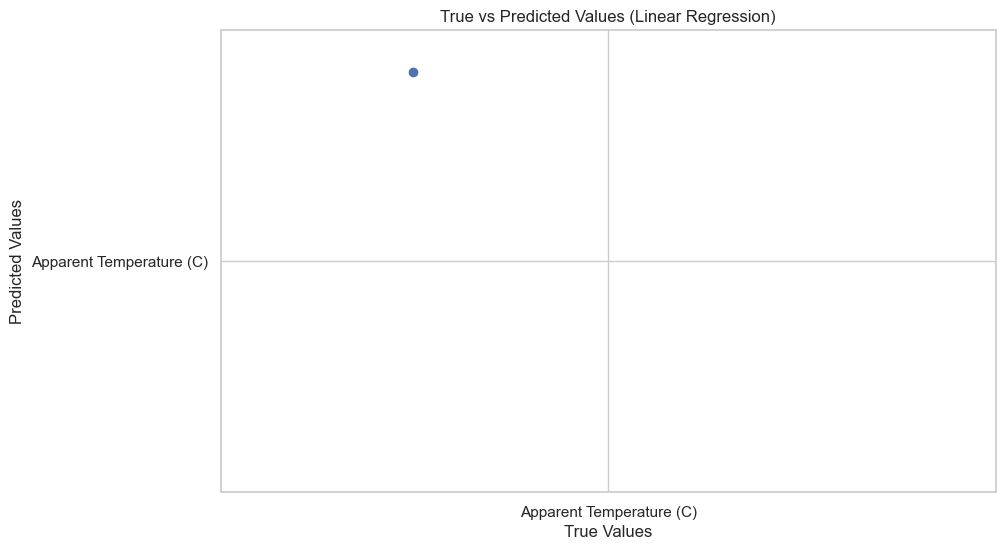

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Line of perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Linear Regression)')
plt.grid(True)
plt.show()

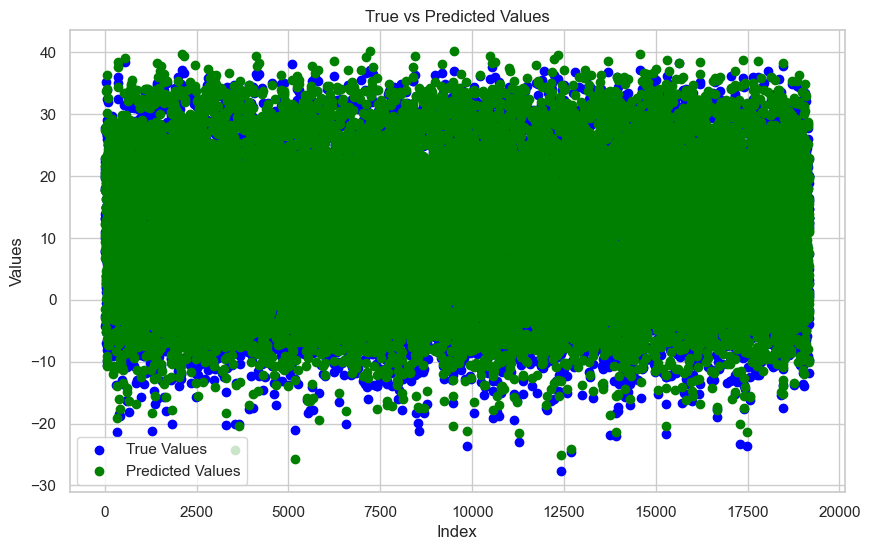

In [24]:
plt.figure(figsize=(10, 6))

# Plot true values
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='True Values')

# Plot predicted values
plt.scatter(np.arange(len(y_pred)), y_pred, color='green', label='Predicted Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()